In [0]:
# Installation required if not present
# !pip install Tensorflow
# !pip install tqdm
# !pip install tflearm

In [1]:
# Import required packages
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.layers import (Dense,Conv2D,Dropout,MaxPool2D,
                                     MaxPooling2D,Flatten)
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from tqdm import tqdm
from random import shuffle

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch import optim
import cv2
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# importing drive and authentication
from google.colab import drive
drive.mount('/content/drive',force_remount=False)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Change the location as per your drive
TRAIN_DIR_INFECTED =r'C:\Users\sumasark\Downloads\Kaggle\Maleria\cell_images\cell_images\Parasitized'
TRAIN_DIR_UNINFECTED =r'C:\Users\sumasark\Downloads\Kaggle\Maleria\cell_images\cell_images\Uninfected'
LR_RATE=1e-3
IMG_SIZE=28

MODEL_NAME = 'maleria--{}--{}.model'.format(LR_RATE,'2conv-basic')

In [0]:
# Preprocess raw images into numpy arrays

training_data = []
def create_data_infected():
    try:
        for img in tqdm(os.listdir(TRAIN_DIR_INFECTED)):
            path = os.path.join(TRAIN_DIR_INFECTED,img)
            img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
            training_data.append([np.array(img),np.array([1,0])])
    except Exception as e:
        print(str(e))   

def create_data_uninfected():
    try:
        for img in tqdm(os.listdir(TRAIN_DIR_UNINFECTED)):
            path = os.path.join(TRAIN_DIR_UNINFECTED,img)
            img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
            training_data.append([np.array(img),np.array([0,1])])
    except Exception  as e:
        print(str(e))
        
def prepare_train():
    try:
        create_data_infected()
        create_data_uninfected()
    except Exception as e:
        print(str(e))
    shuffle(training_data)
    np.save('training_data.npy',training_data)
    return training_data 

"\ntraining_data = []\ndef create_data_infected():\n    try:\n        for img in tqdm(os.listdir(TRAIN_DIR_INFECTED)):\n            path = os.path.join(TRAIN_DIR_INFECTED,img)\n            img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)\n            img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))\n            training_data.append([np.array(img),np.array([1,0])])\n    except Exception as e:\n        print(str(e))   \n\ndef create_data_uninfected():\n    try:\n        for img in tqdm(os.listdir(TRAIN_DIR_UNINFECTED)):\n            path = os.path.join(TRAIN_DIR_UNINFECTED,img)\n            img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)\n            img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))\n            training_data.append([np.array(img),np.array([0,1])])\n    except Exception  as e:\n        print(str(e))\n        \ndef prepare_train():\n    try:\n        create_data_infected()\n        create_data_uninfected()\n    except Exception as e:\n        print(str(e))\n    shuffle(training_data)\n    np.sav

In [0]:
# Loading the preprocessed file for train_sest_split and modeling
df = np.load('/content/drive/My Drive/DataSets/training_data.npy',allow_pickle=True)

X = []
y = []
for img,labels in df:
  X.append(img)
  y.append(labels)

X = np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE,1)
X = X/255.0
y = [np.argmax(x) for x in y]
train_X,test_X,train_y,test_y = train_test_split(X,y,test_size=0.2,random_state=101)
train_y = np.asarray(train_y).astype('float32').reshape((-1,1))
test_y = np.asarray(test_y).astype('float32').reshape((-1,1))

In [0]:
# Define model defination using sequential model from keras
# This is a basic model add more layers as per need
model = Sequential()
model.add(Conv2D(filters = 64, kernel_size=(3,3),input_shape=X.shape[1:],activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters = 64, kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten()) 
model.add(Dense(64))

model.add(Dense(1,activation='sigmoid'))

In [7]:
# Checking the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                102464    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                

In [8]:
# This part is additional use tensorboard for analysis using graph
!pip install tensorboard
from tensorflow.keras.callbacks import TensorBoard
import time

NAME = 'maleria-cell-cnn-64x2-{}'.format(int(time.time()))
tensorboard = TensorBoard(log_dir='/content/drive/My Drive/logs/{}'.format(NAME))

In [9]:
# Compiling and running the model as the number of image is high it will take some time
# And i am doing it for 20 epochs
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(train_X,train_y,batch_size=32,epochs=20,validation_split=0.3,callbacks=[tensorboard])

Epoch 1/20
467/467 [==============================] - 23s 50ms/step - loss: 0.6240 - accuracy: 0.6353 - val_loss: 0.4601 - val_accuracy: 0.7724
Epoch 2/20
467/467 [==============================] - 23s 48ms/step - loss: 0.3858 - accuracy: 0.8217 - val_loss: 0.2739 - val_accuracy: 0.8921
Epoch 3/20
467/467 [==============================] - 22s 48ms/step - loss: 0.2456 - accuracy: 0.9039 - val_loss: 0.2484 - val_accuracy: 0.9019
Epoch 4/20
467/467 [==============================] - 22s 48ms/step - loss: 0.2049 - accuracy: 0.9221 - val_loss: 0.2086 - val_accuracy: 0.9278
Epoch 5/20
467/467 [==============================] - 22s 48ms/step - loss: 0.1740 - accuracy: 0.9359 - val_loss: 0.1989 - val_accuracy: 0.9235
Epoch 6/20
467/467 [==============================] - 22s 48ms/step - loss: 0.1652 - accuracy: 0.9387 - val_loss: 0.1864 - val_accuracy: 0.9285
Epoch 7/20
467/467 [==============================] - 22s 47ms/step - loss: 0.1567 - accuracy: 0.9409 - val_loss: 0.1931 - val_accuracy:

In [0]:
# Saving the model into disk for avoiding retraining
model.save("/content/drive/My Drive/model_cnn_iter_40.h5")

In [11]:
# Loading the model back to disk this can be done is separate file also
import tensorflow as tf 
classifierLoad = tf.keras.models.load_model('/content/drive/My Drive/model_cnn_iter_40.h5')

In [12]:
# Checking model after load
classifierLoad.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                102464    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                

In [13]:
# Prediction on the test set
pred_y = classifierLoad.predict_classes(test_X)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [14]:
# Calculating different metrics add more as per needs
from sklearn.metrics import log_loss,roc_auc_score,accuracy_score,roc_curve,precision_recall_curve

loss = log_loss(test_y,pred_y)
print('loss:',loss)
auc = roc_auc_score(test_y,pred_y)
print('auc:',auc)
accuracy = accuracy_score(test_y,pred_y)
print('accuracy={}'.format(accuracy))

loss: 3.5089770603249835
auc: 0.8951677228028851
accuracy=0.8984067478912839


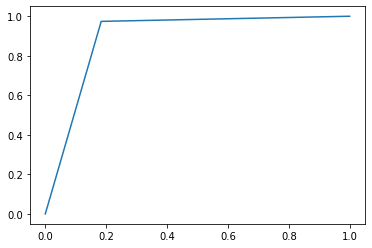

In [15]:
# Checking ROC Curve
fpr,tpr,thresh = roc_curve(test_y,pred_y)
plt.plot(fpr,tpr)

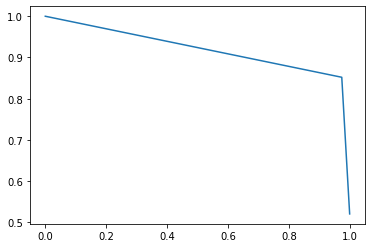

In [16]:
# Checking Precision recall curve
p,r,th = precision_recall_curve(test_y,pred_y)
plt.plot(r,p)

In [17]:
'''
# Check Model ModelCheckpoint tensorflow
# Transfer Learning

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

IMG_SIZE = [28,28]
vgg = VGG16(input_shape=IMG_SIZE + [1],weights='imagenet',include_top=False)
'''

"\n# Check Model ModelCheckpoint tensorflow\n# Transfer Learning\n\nfrom tensorflow.keras.applications.vgg16 import VGG16\nfrom tensorflow.keras.applications.vgg16 import preprocess_input\n\nIMG_SIZE = [28,28]\nvgg = VGG16(input_shape=IMG_SIZE + [1],weights='imagenet',include_top=False)\n"